In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Dùng thư viện yfinance để tải dataset
import yfinance as yf

start_date = '2017-01-01'
end_date = '2023-05-05'
symbol = 'AAPL' #  Apple Inc.

data = yf.download(symbol, start=start_date, end=end_date)
data.to_csv('/content/sample_data/HPG-Historical-Data.csv')

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Xem data
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,28.950001,29.082500,28.690001,29.037500,27.095852,115127600
2017-01-04,28.962500,29.127501,28.937500,29.004999,27.065525,84472400
2017-01-05,28.980000,29.215000,28.952499,29.152500,27.203156,88774400
2017-01-06,29.195000,29.540001,29.117500,29.477501,27.506426,127007600
2017-01-09,29.487499,29.857500,29.485001,29.747499,27.758373,134247600
...,...,...,...,...,...,...
2023-04-28,168.490005,169.850006,167.880005,169.679993,169.445618,55209200
2023-05-01,169.279999,170.449997,168.639999,169.589996,169.355743,52472900
2023-05-02,170.089996,170.350006,167.539993,168.539993,168.307190,48425700


In [ ]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error

In [ ]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 7:1:2
df = pd.read_csv('/content/sample_data/VCB.csv')
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.8 * len(df))
test_size = int(0.1 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [ ]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [ ]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(x_val)

In [ ]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[95734.87744447 95775.53671854 95816.1959926  95856.85526666
 95897.51454073 95938.17381479 95978.83308885 96019.49236292
 96060.15163698 96100.81091104 96141.47018511 96182.12945917
 96222.78873323 96263.4480073  96304.10728136 96344.76655542
 96385.42582949 96426.08510355 96466.74437761 96507.40365168
 96548.06292574 96588.7221998  96629.38147387 96670.04074793
 96710.700022   96751.35929606 96792.01857012 96832.67784419
 96873.33711825 96913.99639231]


In [ ]:
# 7. Đánh giá độ chính xác validate, test
# Tính toán các độ đo đánh giá trên tập validation
val_mae = mean_absolute_error(y_val, y_pred_val)
val_mape = mean_absolute_percentage_error(y_val, y_pred_val)
# Tính toán RMSE cho tập validation
valid_rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))

# Tính toán các độ đo đánh giá trên tập test
test_mae = mean_absolute_error(y_test, y_pred)
test_mape = mean_absolute_percentage_error(y_test, y_pred)

# In ra các độ đo đánh giá
print('Validation RMSE:', valid_rmse)
print('Validation MAE:', val_mae)
print('Validation MAPE:', val_mape)

print('Testing MAE:', test_mae)
print('Testing MAPE:', test_mape)


Validation RMSE: 7182.418563415064
Validation MAE: 5371.470807519182
Validation MAPE: 0.06551261278427772
Testing MAE: 11498.699684142095
Testing MAPE: 0.15637458695287845


Validation RMSE: 8.984489939104257
Testing RMSE: 30.527954908112058


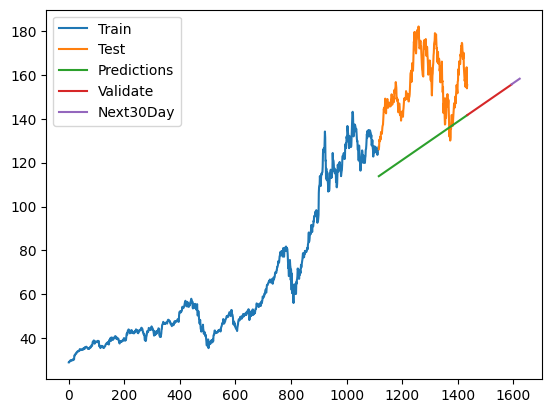

In [ ]:
# 8. Tính RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# 9.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [ ]:
test_data.index

RangeIndex(start=1116, stop=1435, step=1)